In [1]:
# Import the required packages
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi

In [2]:
#!pip install windrose openpyxl
from windrose import WindroseAxes

In [48]:
df = pd.read_csv("D:/Allaus/Data_analysis/Altres_estacions_from_meteo/7_temps_outliers/Borda_Vidal.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.dtypes

id                       int64
date            datetime64[ns]
temp_max               float64
temp_min               float64
dir_max                float64
vel_max                float64
dir_med                float64
vel_med                float64
rain                   float64
dir_max_qual            object
dir_med_qual            object
dtype: object

In [49]:
start_date = df.date[0]
end_date = df.date[len(df)-1]
print(start_date, end_date)

2008-07-01 00:00:00 2023-02-28 00:00:00


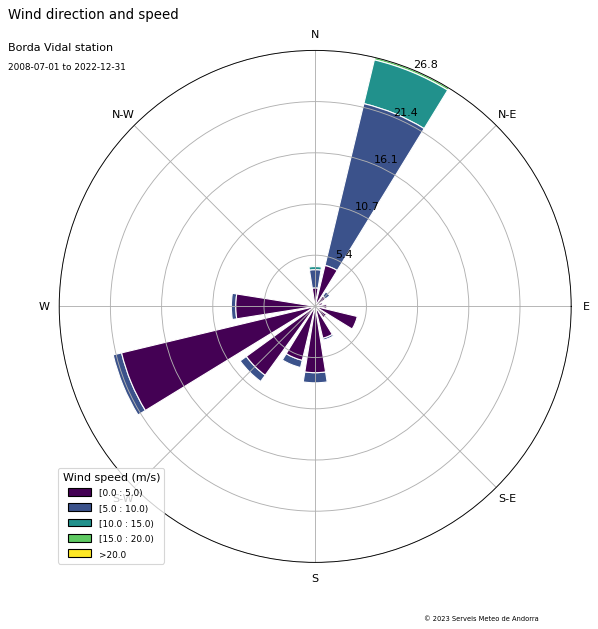

In [51]:
ax = WindroseAxes.from_ax()
ax.bar(df.dir_med, df.vel_med, normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 25, 5))
ax.set_legend(title='Wind speed (m/s)')

#-- add some text
plt.gcf().text(0.02, 0.95,'Wind direction and speed', fontsize=12)
plt.gcf().text(0.02, 0.9, 'Borda Vidal station', fontsize=10)
plt.gcf().text(0.02, 0.87,'2008-07-01 to 2022-12-31', fontsize=8)

#-- add copyright
plt.figtext(0.85, 0.01, "© 2023 Serveis Meteo de Andorra", ha="right", fontsize=6)

#-- save plot to PNG file
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/Borda Vidal - windrose.png', bbox_inches='tight', dpi=200)
plt.show()

<Axes: xlabel='velocidad_x', ylabel='velocidad_y'>

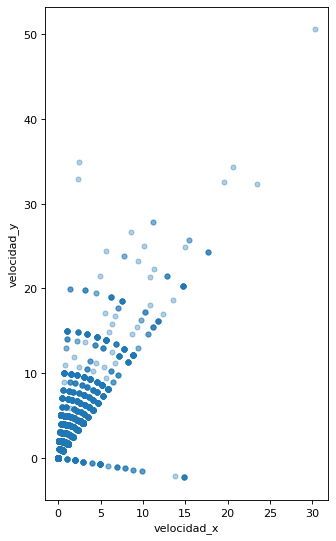

In [10]:
df['velocidad_x'] = df['wind_vel'] * np.sin(df['wind_dir'] * pi / 180.0)
df['velocidad_y'] = df['wind_vel'] * np.cos(df['wind_dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.35, ax=ax)

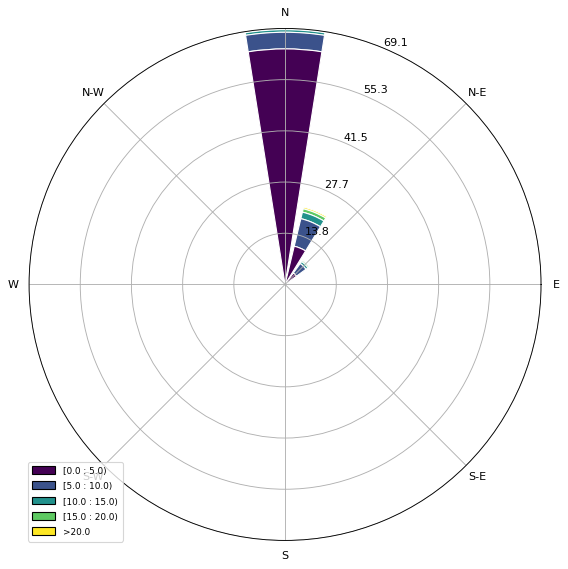

In [12]:
ax = WindroseAxes.from_ax()
ax.bar(df.wind_dir, df.wind_vel, normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 25, 5))
ax.set_legend()

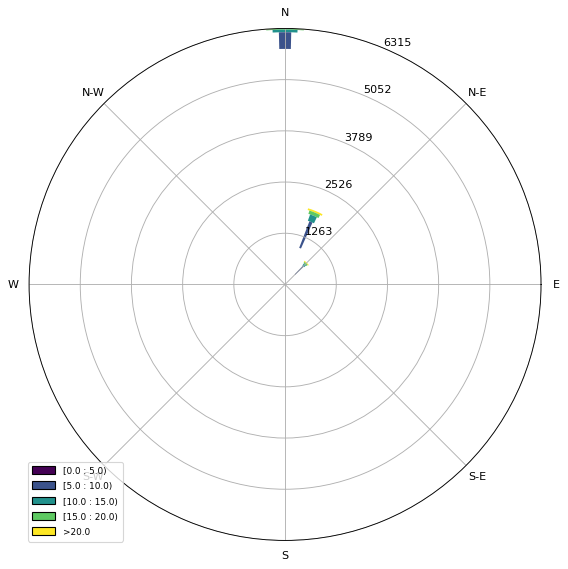

In [13]:
ax = WindroseAxes.from_ax()
ax.box(df.wind_dir, df.wind_vel, bins=np.arange(0, 25, 5))
ax.set_legend()

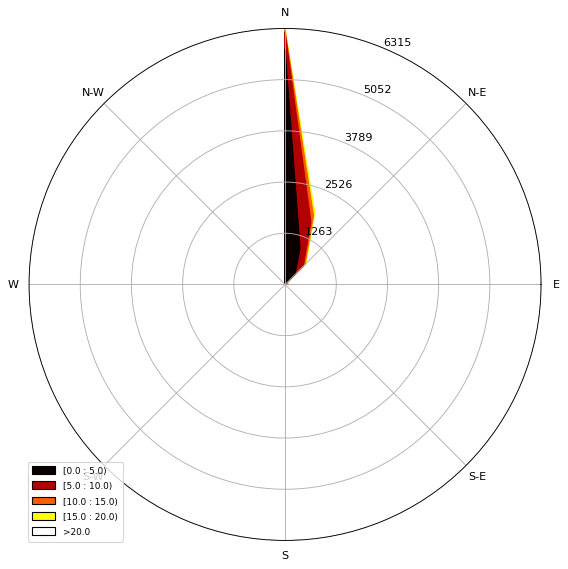

In [14]:
ax = WindroseAxes.from_ax()
ax.contourf(df.wind_dir, df.wind_vel, bins=np.arange(0, 25, 5), cmap=cm.hot)
ax.set_legend()

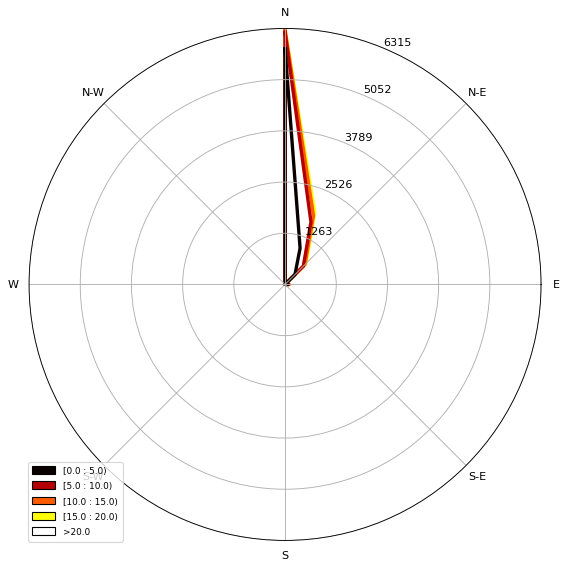

In [15]:
ax = WindroseAxes.from_ax()
ax.contour(df.wind_dir, df.wind_vel, bins=np.arange(0, 25, 5), cmap=cm.hot, lw=3)
ax.set_legend()